# Phân tích bộ dữ liệu HousePrice _ Đống Đa

In [1]:
# Nhập thư viện

import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [2]:
# Nhập dữ liệu

data = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv', encoding='unicode_escape')


In [3]:
# Yêu cầu
# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”,
# house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
# Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai
# Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, 
# Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

In [4]:
# Xem 5 dòng đầu

data.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [13]:
# Xem dữ liệu có bao nhiêu dòng, cột

data.shape

(671, 12)

In [5]:
# Xem 5 dòng cuối

data.tail()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho
670,107.0,45000.0,44325,So do,NaN,NaN,NaN,NaN,5.0,21.009123,105.824428,mat pho


In [6]:
# Xem 10 dòng ngẫu nhiên

data.sample(10)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
437,62.0,16000.0,44325,So do,dong-Nam,dong-Nam,NaN,5.0,5.0,21.017988,105.833442,trong ngo
610,108.0,28500.0,44323,So do,NaN,NaN,6.0,5.0,7.0,21.022578,105.831854,mat pho
632,80.0,23500.0,44323,NaN,NaN,NaN,NaN,NaN,2.0,21.020053,105.824627,mat pho
393,36.0,2550.0,44325,So do,NaN,NaN,1.0,2.0,1.0,21.029522,105.827353,trong ngo
304,84.0,34600.0,44312,So do,NaN,NaN,8.0,8.0,8.0,21.009239,105.824230,trong ngo
46,35.0,1300.0,44197,So do,NaN,NaN,1.0,1.0,NaN,21.026246,105.832586,trong ngo
217,36.0,5800.0,44303,NaN,NaN,NaN,NaN,NaN,5.0,21.005886,105.833142,trong ngo
560,69.0,21800.0,44312,So do,NaN,NaN,NaN,10.0,7.0,21.017288,105.836411,mat pho
114,0.0,NaN,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,trong ngo
392,300.0,34300.0,44325,So do,NaN,NaN,NaN,NaN,3.0,21.013468,105.807427,trong ngo


In [7]:
# Xem thông tin dạng từng cột

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [10]:
# Nhận xét: nhận thấy rằng có nhiều giá trị bị khuyết thiếu

In [8]:
# Xem tổng quát thông kê mô tả

data.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [9]:
data.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [12]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

data.dropna(subset = ['price'])

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [17]:
data['land_certificate'].fillna('không có thông tin')

0                   So do
1                   So do
2                   So do
3                   So do
4                   So do
              ...        
666    không có thông tin
667                 So do
668    không có thông tin
669    không có thông tin
670                 So do
Name: land_certificate, Length: 671, dtype: object

In [23]:
data['house_direction'].mode()

0    dong-Nam
Name: house_direction, dtype: object

In [27]:
data['house_direction'].fillna('dong-Nam')

0      dong-Nam
1           Nam
2      dong-Nam
3      dong-Nam
4      dong-Nam
         ...   
666    dong-Nam
667    dong-Nam
668    dong-Nam
669    dong-Nam
670    dong-Nam
Name: house_direction, Length: 671, dtype: object

In [28]:
# Cô cho mình hỏi 2 câu code trên mình có thể có cách nào gộp chung lại được không cô, mình có làm thử
# như sau: data['house_direction'].fillna(data['house_direction'].mode())
# nhưng ko ra được kết quả

In [25]:
data['balcony_direction'].mode()

0    dong-Nam
Name: balcony_direction, dtype: object

In [29]:
data['balcony_direction'].fillna('dong-Nam')

0      dong-Nam
1           Nam
2      dong-Nam
3      dong-Nam
4      dong-Nam
         ...   
666    dong-Nam
667    dong-Nam
668    dong-Nam
669    dong-Nam
670    dong-Nam
Name: balcony_direction, Length: 671, dtype: object

In [26]:
data['toilet'].mode()

0    4.0
Name: toilet, dtype: float64

In [30]:
data['toilet'].fillna(4.0)

0      4.0
1      3.0
2      6.0
3      4.0
4      4.0
      ... 
666    3.0
667    4.0
668    4.0
669    4.0
670    4.0
Name: toilet, Length: 671, dtype: float64

In [36]:
data['bedroom'].mode()

0    3.0
Name: bedroom, dtype: float64

In [37]:
data['bedroom'].fillna(3.0)

0      6.0
1      8.0
2      5.0
3      3.0
4      3.0
      ... 
666    3.0
667    6.0
668    3.0
669    3.0
670    3.0
Name: bedroom, Length: 671, dtype: float64

In [34]:
data['floor'].mode()

0    5.0
Name: floor, dtype: float64

In [38]:
data['floor'].fillna(5.0)

0      6.0
1      4.0
2      6.0
3      4.0
4      5.0
      ... 
666    3.0
667    5.0
668    5.0
669    5.0
670    5.0
Name: floor, Length: 671, dtype: float64

# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [40]:
data_1 = data[data['property_type'] == 'trong ngo']
data_1

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,NaN,dong-Bac,Tay-Bac,NaN,NaN,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,NaN,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,NaN,NaN,NaN,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,NaN,NaN,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [ ]:
# cô ơi, tại sao ở trên mình đã fill na rồi mà dưới này, data_1 vẫn còn tồn tại NA?
# làm thế nào để xử lý tình huống này cô?

# Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [42]:
data['giá/m2'] = round((data['price']* 1000) / data['area'], 2)
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.00
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.21
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.35
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.46
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo,98750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho,139880.95
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho,269230.77
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho,291666.67
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho,551111.11


# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

# Diện tích: area

<Axes: >

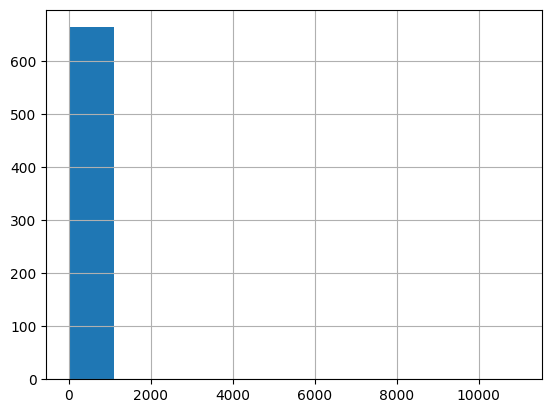

In [43]:
data['area'].hist()

In [44]:
data['area'].describe()

count      665.000000
mean       103.763534
std        471.861867
min          0.000000
25%         39.000000
50%         55.000000
75%         80.000000
max      11000.000000
Name: area, dtype: float64

In [45]:
# Lọc giá trị ngoại lai theo phương pháp IQR

Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)

IQR = Q3 - Q1
IQR

41.0

In [46]:
# xác định khoảng trên và khoảng dưới

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(lower)
print(upper)

-22.5
141.5


In [47]:
# lọc giá trị ngoại lai

data_area_outlier = data[(data['area'] < lower) | (data['area'] > upper)]
data_area_outlier

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
33,210.0,4200.0,44197,So do,NaN,NaN,2.0,3.0,NaN,21.001275,105.839304,trong ngo,20000.00
225,180.0,36000.0,44306,So do,NaN,NaN,NaN,4.0,2.0,21.012310,105.828978,trong ngo,200000.00
232,300.0,48000.0,44306,NaN,NaN,NaN,NaN,NaN,4.0,21.009239,105.824230,trong ngo,160000.00
351,300.0,120000.0,44323,So do,NaN,NaN,NaN,6.0,3.0,21.009239,105.824230,trong ngo,400000.00
374,168.0,23520.0,44323,So do,NaN,NaN,3.0,3.0,3.0,21.000549,105.828985,trong ngo,140000.00
392,300.0,34300.0,44325,So do,NaN,NaN,NaN,NaN,3.0,21.013468,105.807427,trong ngo,114333.33
405,168.0,22500.0,44325,So do,NaN,NaN,1.0,5.0,1.0,21.000549,105.828985,trong ngo,133928.57
442,180.0,36500.0,44325,So do,Tay-Bac,Tay-Bac,NaN,NaN,4.0,21.016493,105.822814,trong ngo,202777.78
465,234.0,NaN,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,mat pho,NaN
468,142.0,70000.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,mat pho,492957.75


In [48]:
data_area_outlier.shape

(57, 13)

In [49]:
# Dữ liệu không chứa ngoại lai của cột area

data_area = data[~((data['area'] < lower) | (data['area'] > upper))]
data_area

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.00
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.21
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.35
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.46
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo,98750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,56.0,NaN,44325,NaN,NaN,NaN,6.0,6.0,5.0,21.024038,105.802626,mat pho,NaN
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho,269230.77
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho,291666.67
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho,551111.11


# giá/m2

In [50]:
data['giá/m2'].describe()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count       615.000
mean            inf
std             NaN
min         122.500
25%      100714.285
50%      169090.910
75%      290909.090
max             inf
Name: giá/m2, dtype: float64

ValueError: supplied range of [122.5, inf] is not finite

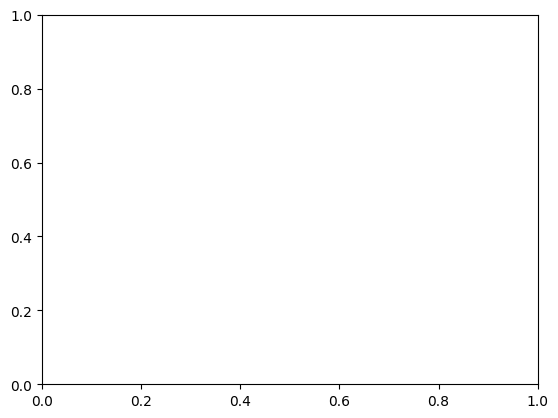

In [51]:
data['giá/m2'].hist()

In [ ]:
# Hình như tính toán ra số có vấn đề a cô?

In [ ]:
# Yêu cầu: loại bỏ dữ liệu ngoại lai của cột area, mình thấy nên tách thành 2 bảng để phân tích, 
# vì trên thực tế có những ngôi nhà mặt đất có diện tích lớn như vậy (ở đây là số lượng 57 mảnh/ 671 mảnh), 
# nên bỏ đi thì thì có khi lại không phù hợp với tình hình thực tế.

# Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

<Axes: >

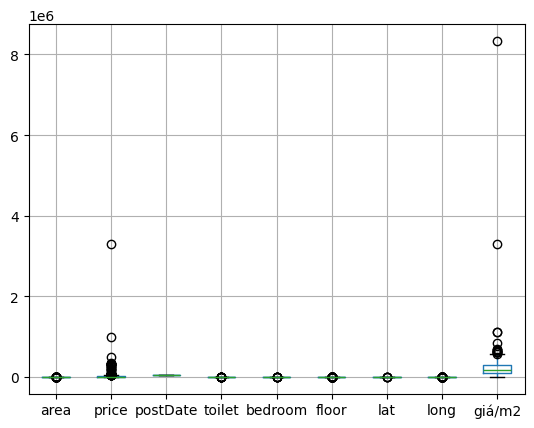

In [53]:
data.boxplot()

In [52]:
# z- score scaling

In [56]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phương pháp vào tập dữ liệu
data_s = s_scaler.fit_transform(data[['giá/m2']])

# đưa lại về dạng bảng

data_s = pd.DataFrame(data_s, columns=['price/m2'])
data_s

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
# dữ liệu số quá lớn để tính toán fai không cô?

In [57]:
# Minmax scaling

# khai báo phương pháp
minmax_scaler = MinMaxScaler()

# áp phong pháp vão tâp dû liêu
data_m = minmax_scaler.fit_transform(data[['giá/m2']])

# đưa lại về dạng bảng
data_m = pd.DataFrame(data_m, columns=['price/m2'])
data_m

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [58]:
# Robust Scaling

# khai báo phương pháp
robust_scaler = RobustScaler()

# áp phương pháp vào tập DL
data_r = robust_scaler.fit_transform(data[['giá/m2']])

# đưa lại về dạng bảng
data_r = pd.DataFrame(data_r, columns='price/m2')
data_r

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [59]:
# hình như dữ liệu quá lớn nên có lỗi fai không cô?